<a href="https://colab.research.google.com/github/rohithv-21/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Credit Card Default Prediction**



##### **Project Type**    - Classification Algorithm
##### **Contribution**    - Individual


# **GitHub Link -**



# **Project Summary -**

The aim of a credit card default prediction project is to develop a machine learning model that can accurately predict which credit card users are likely to default on their payments in the future. The model should use historical data of credit card users such as their payment history, credit limit, age, education, and other demographic information to identify patterns and trends that can help predict default behavior. The project focuses on utilizing historical data of Customer's default payment in Taiwan.

* There were **30000 records and 25 attributes** in the dataset.
* We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA) to get a clear insight into each feature by separating the dataset into numeric and categoric features. We did Univariate, Bivariate, and even multivariate analyses.
* After that, the outliers and null values were checked from the raw data. Data were transformed to ensure that it was compatible with machine learning models.
* In feature engineering we transformed raw data into a more useful and informative form, by **encoding**, **feature manipulation**, and **feature selection**. We handled target class imbalance using **SMOTE**.
* Then finally cleaned and scaled data was sent to various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model. To select the final model based on requirements, we checked model_result.
* When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, however, **focusing more on the Recall score and F1 score** because we are dealing with credit card data and our data is unbalanced.

# **Index**

1. Problem Statement
2. Know Your Data
3. Understanding Your Variables
4. EDA
5. Data Cleaning
6. Hypothesis Testing
7. Feature Engineering
8. Model Building
9. Model Implementaion.
10. Conclusion

## **1. Problem Statement**

Despite high returns, credit cards carry significant risks. The ever-expanding number of credit cards has achieved an expansion in how much credit card defaults and the subsequent enormous measure of bills and repayment data information have likewise carried specific hardships to the risk controllers. As a result, one of the primary concerns of banks is how to use the data generated by users and extract useful information to control risks, reduce the default rate, and control the growth of non-performing assets.

A credit card issuer based in Taiwan wants to learn more about how likely its customers are to default on their payments and the main factors that influence this probability. The issuer's decisions regarding who to issue a credit card to and what credit limit to offer would be informed by this information. The issuer's future strategy, including plans to offer targeted credit products to their customers, would be informed by a better understanding of their current and potential customers as a result of this.

**Our objective**
* To determine the main factors that influence the likelihood of defaulting on a credit card.
* To determine the likelihood that Bank customers will default on their credit card payments.


### **Business Context**
The goal of credit card default prediction is to help credit card companies and lenders to better manage their risk and minimize losses. By predicting which credit card users are likely to default on their payments, lenders can take proactive steps to mitigate the risk, such as offering lower credit limits, higher interest rates, or other measures to reduce the risk of default.

Overall, credit card default prediction is an important tool for lenders to manage risk and ensure the stability of the credit card industry. It relies on sophisticated machine learning algorithms to analyze large volumes of historical data and make accurate predictions about future credit card payment behavior.

## **2. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# libraries to do statistical analysis
import math
from scipy.stats import *

# libraries used to pre-process
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# libraries used to implement models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# libraries to evaluate performance
import sklearn.metrics as metrics
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings("ignore")

# to set max column display
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [ ]:
# load the Default of Credit Card Clients data set from the drive
clients_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Credit Card Default Prediction - Navneet Keshri/default of credit card clients.csv',header = 1)

### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
clients_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns Count

In [ ]:
# Dataset Rows & Columns
clients_df.shape

(30000, 25)

In [ ]:
print(f'number of rows : {clients_df.shape[0]}  \nnumber of columns : {clients_df.shape[1]}')

number of rows : 30000  
number of columns : 25


### Dataset Information

In [ ]:
# Dataset Info
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

We have 25 columns. All of them are numerical as of now but we have to check for categorical data if there is any.

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

When there are identical instances in a dataset, it is referred to as "duplication." Such duplication could occur due to erroneous data entry or data collection procedures. Eliminating duplicate data from the dataset saves time and money by avoiding the repetition of the same data sent to the machine learning model.

In [ ]:
# Dataset Duplicate Value Count
# Checking Duplicate Values
value=len(clients_df[clients_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there is no duplicate entry in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

Real-world data often contains numerous missing values, which can be due to data corruption or other factors. As many machine-learning algorithms do not support missing values, it is necessary to handle them during the dataset pre-processing stage. Thus, the first step in dealing with missing data is to identify the missing values.

In [ ]:
# Missing Values/Null Values Count
print(clients_df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


<AxesSubplot:>

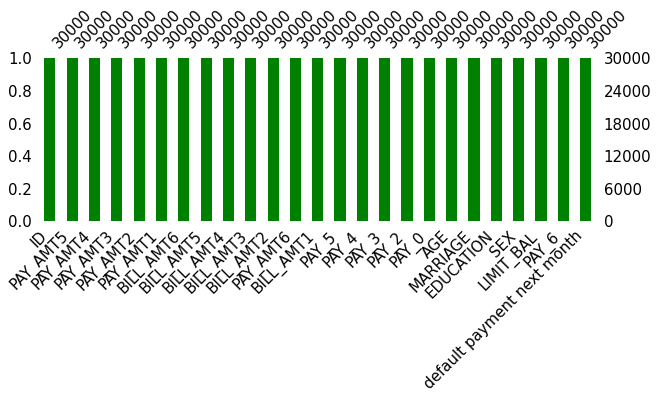

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(clients_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<AxesSubplot:>

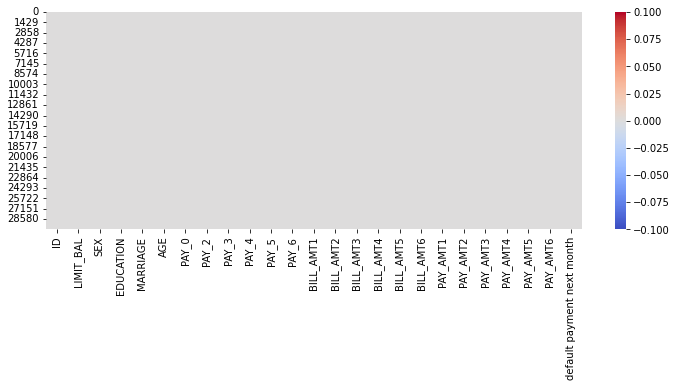

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(clients_df.isna(), cmap = 'coolwarm')

From the above command, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.

### What did you know about your dataset?

There are 30000 rows and 25 columns in the dataset. The dataset does not contain any duplicate or missing values.

The given dataset is from the banking industry. Our task is to examine customer credit default and its causes.The proactive identification of customers most likely to default on loan payments is the first step in predicting customer loan default. This is typically done by dynamically analyzing pertinent customer data and actions.



## **3. Understanding Your Variables**

###  Columns

In [ ]:
# Dataset Columns
clients_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

###  Statistical Summary

In [ ]:
# Dataset Describe
clients_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


###  Variables Description

The dataset contains data from credit card indistry in Taiwan and has collected the usage, historical payments and default status of the customers.


**Attribute Information:**

* **ID	:** ID of each client
* **LIMIT_BAL	:** Amount of given credit in NT dollars
* **SEX	:** Gender (1=male, 2=female)
* **EDUCATION	:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE	:** Marital status (1=married, 2=single, 3=others)
* **AGE	:** Age in years
* **PAY_0	:** Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2	:** Repayment status in August, 2005 (scale same as above)
* **PAY_3	:** Repayment status in July, 2005 (scale same as above)
* **PAY_4	:** Repayment status in June, 2005 (scale same as above)
* **PAY_5	:** Repayment status in May, 2005 (scale same as above)
* **PAY_6	:** Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1	:** Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2	:** Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3	:** Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4	:** Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5	:** Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6	:** Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1	:** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2	:** Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3	:** Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4	:** Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5	:** Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6	:** Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month	:** Default payment (1=yes, 0=no)

### Unique Values

In [ ]:
# print the unique value
clients_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [ ]:
# Check Unique Values for each variable.
for i in clients_df.columns.tolist():
  print("No. of unique values in ",i,"is",clients_df[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

### Observations:

* We are focusing on several key columns of our dataset, including 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', and 'PAY_AMT' as they contain a wealth of information.
* By utilizing these features, we plan to create a classification model and implement various classification algorithms.


## **4. EDA**

#### **What is EDA?**
* Exploratory Data Analysis (EDA) is a critical step in the data science process that involves analyzing and understanding the data. The primary objective of EDA is to gain insights into the data, uncover patterns, and detect relationships and trends. This iterative process helps identify outliers, missing values, and other issues that may impact the analysis and modeling of the data.


### **4.1 Renaming Features**

In [ ]:
# Renaming complex columns name for the sake of simplicity    **(Not a necessary step to do)**
# Changing inconsistent column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DP_NEXT_MONTH'
clients_df.rename(columns={'PAY_0':'PAY_1','default payment next month':'DP_NEXT_MONTH'},inplace = True)
clients_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DP_NEXT_MONTH'],
      dtype='object')

### **4.2 Column: 'DP_NEXT_MONTH'**

Text(0.5, 1.0, 'Percentage of Default and Non-Default Payment')

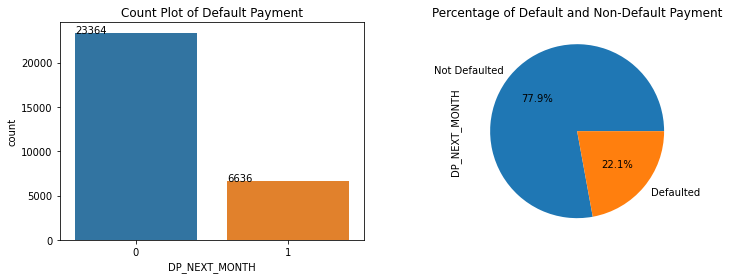

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,4))

# Univariate analysis
# Count Plot of Default Payment
count = sns.countplot(data=clients_df, x='DP_NEXT_MONTH', ax=ax[0])
count.set_title('Count Plot of Default Payment')

# adding value count on the top of bar
for p in count.patches:
  count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Univariate analysis
# Percentage of Default and Non-Default Payment
pie = clients_df['DP_NEXT_MONTH'].value_counts().plot(kind='pie',autopct="%1.1f%%",labels=['Not Defaulted','Defaulted'], ax=ax[1])
pie.set_title('Percentage of Default and Non-Default Payment')

**Observation:**
* We can observe from the graphs that the number of default payments in the data is low in number compared to the number of not default payments. The count of default payments is 6636 while the count of not default payments is 23364.
* By percentage 22.1% of customers defaulted on their payment whereas 77.9% of customers do not default on their credit card payment.
* We can say that the data is highly imbalanced which we need to balance. We will do that in the feature engineering step.

### **4.3 Column: 'LIMIT_BAL'**

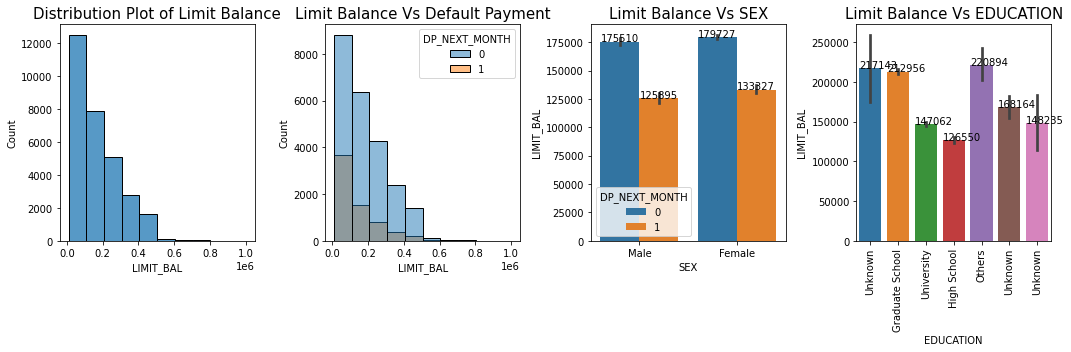

In [ ]:
fig,ax = plt.subplots(1,4, figsize=(15,5))

# Distribution analysis of Limit Balance
hist = sns.histplot(clients_df['LIMIT_BAL'],bins=10, ax=ax[0])
hist.set_title('Distribution Plot of Limit Balance', size=15)

# Bi-variate analysis
# Limit Balance Vs Default Payment
hist = sns.histplot(data=clients_df, x='LIMIT_BAL', hue='DP_NEXT_MONTH',bins=10, ax=ax[1])
hist.set_title('Limit Balance Vs Default Payment', size=15)

# Multi-variate analysis
# Limit Balance Vs SEX
bar = sns.barplot(data=clients_df, x='SEX', y='LIMIT_BAL',hue='DP_NEXT_MONTH', ax=ax[2])
bar.set_title('Limit Balance Vs SEX', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories
# Gender (1=male, 2=female)
bar.set_xticklabels(['Male', 'Female'])

# Bi-variate analysis
# Limit Balance Vs EDUCATION
bar = sns.barplot(data=clients_df, x='EDUCATION', y='LIMIT_BAL', ax=ax[3])
bar.set_title('Limit Balance Vs EDUCATION', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
bar.set_xticklabels(['Unknown','Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Unknown'])

# Set x-ticks rotation to 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:**
* Most of the customers get up to 2 lakhs of credit limit balance.
* There appears to be a negative correlation between the percentage of defaults and credit limit.
* On average females gets more limit than males. The female has an average of 170k while the male has an average of 163k.
* Graph also indicates that higher education means a higher credit limit. We have to categorize all the unknown education categories as one.

### **4.4 Column: 'SEX'**

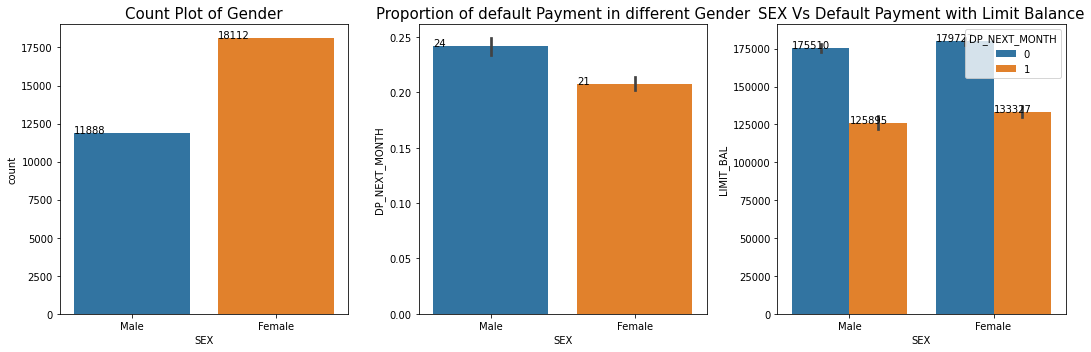

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Univariate analysis
count = sns.countplot(clients_df['SEX'], ax=ax[0])
count.set_title('Count Plot of Gender', size=15)

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories
# Gender (1=male, 2=female)
count.set_xticklabels(['Male', 'Female'])


# Bi-variate analysis
# SEX Vs Default Payment
bar = sns.barplot(data=clients_df, x='SEX', y='DP_NEXT_MONTH', ax=ax[1])
bar.set_title('Proportion of default Payment in different Gender', size=15)

# Assign labels to the x-axis categories
# Gender (1=male, 2=female)
bar.set_xticklabels(['Male', 'Female'])

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height()*100, '.0f'), (p.get_x(), p.get_height()))

# Multi-variate analysis
# SEX Vs Default Payment with Limit Balance
bar = sns.barplot(data=clients_df, x='SEX', y='LIMIT_BAL', hue='DP_NEXT_MONTH', ax=ax[2])
bar.set_title('SEX Vs Default Payment with Limit Balance', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories
# Gender (1=male, 2=female)
bar.set_xticklabels(['Male', 'Female'])

plt.tight_layout()
plt.show()

**Observation:**
* There are 18112 females and 11888 males in the data set.
* About 24% percent of males defaulted and about 21% of the female defaulted.
* Number of males who defaulted is less in number but the proportion is greater. It might be possible because males have fewer credit limits on their credit cards as we can see in the graph too.

### **4.5 Column: 'EDUCATION'**

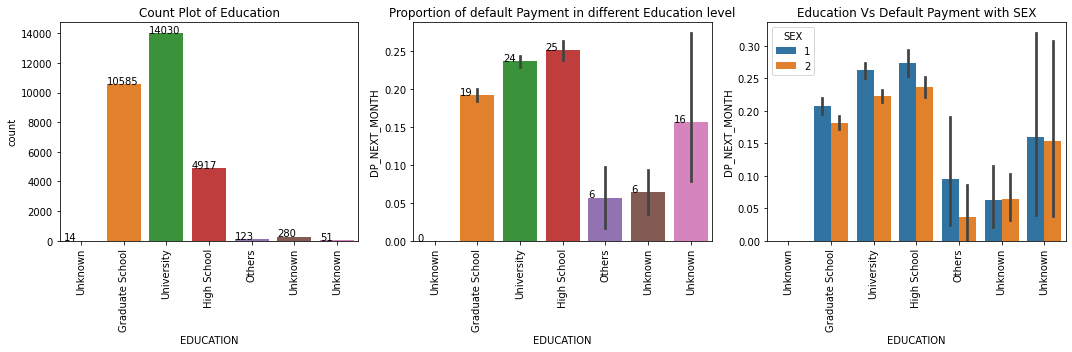

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Univariate analysis
count = sns.countplot(clients_df['EDUCATION'], ax=ax[0])
count.set_title('Count Plot of Education')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
count.set_xticklabels(['Unknown','Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Unknown'], rotation=90)


# Bi-variate analysis
# EDUCATION Vs Default Payment
bar = sns.barplot(data=clients_df, x='EDUCATION', y='DP_NEXT_MONTH', ax=ax[1])
bar.set_title('Proportion of default Payment in different Education level')

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height()*100, '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
bar.set_xticklabels(['Unknown','Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Unknown'], rotation=90)


# Multi-variate analysis
# EDUCATION Vs Default Payment with SEX
bar = sns.barplot(data=clients_df, x='EDUCATION', y='DP_NEXT_MONTH', hue='SEX', ax=ax[2])
bar.set_title('Education Vs Default Payment with SEX')

# Assign labels to the x-axis categories
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
bar.set_xticklabels(['Unknown','Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Unknown'], rotation=90)

plt.tight_layout()
plt.show()

**Observation:**

* 10,585 people with degrees from graduate schools; 14,030 individuals with college degrees; 4,917 people with high school degrees. Count of customers who has completed University is most in numbers followed by Graduate School and High School.
* With the rise in education level proportion of default decreases. We can see that Graduate School education level customers defaulted by 19% while University Education level customer default percentage is 24% followed by High School with 25%.
* In almost all education levels females have less default percentage than males.

### **4.6 Column: 'MARRIAGE'**

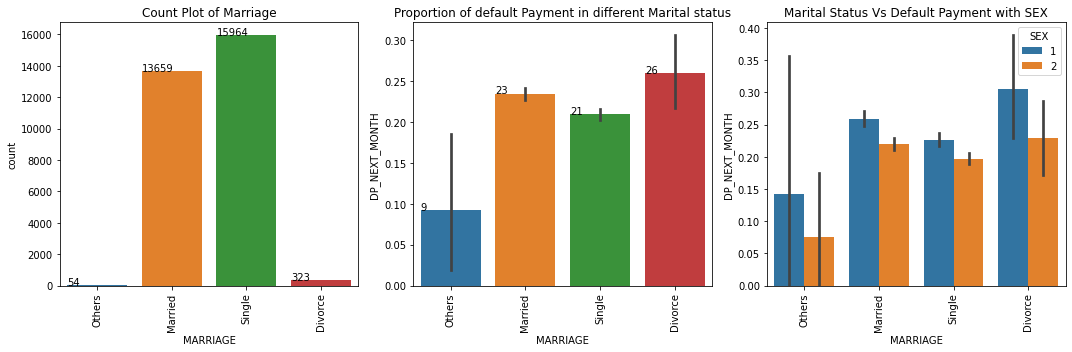

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Univariate analysis
count = sns.countplot(clients_df['MARRIAGE'], ax=ax[0])
count.set_title('Count Plot of Marriage')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)
count.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)


# Bi-variate analysis
# MARRIAGE Vs Default Payment
bar = sns.barplot(data=clients_df, x='MARRIAGE', y='DP_NEXT_MONTH', ax=ax[1])
bar.set_title('Proportion of default Payment in different Marital status')

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height()*100, '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)
bar.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)


# Multi-variate analysis
# MARRIAGE Vs Default Payment with SEX
bar = sns.barplot(data=clients_df, x='MARRIAGE', y='DP_NEXT_MONTH', hue='SEX', ax=ax[2])
bar.set_title('Marital Status Vs Default Payment with SEX')

# Assign labels to the x-axis categories
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)
bar.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)

plt.tight_layout()
plt.show()

**Observation:**

* 13,659 people who are married; 15,964 single people; 323 people who divorced; 54 people who are considered "others." Count of customers who are single is most in numbers followed by married and divorced.
* The number of defaults appears to be highest among divorced people (26%) and lowest among single people (21%) (ignoring "Others" due to the low count).
* In all Marital status females have less default percentage than males.






### **4.7 Column: 'AGE'**

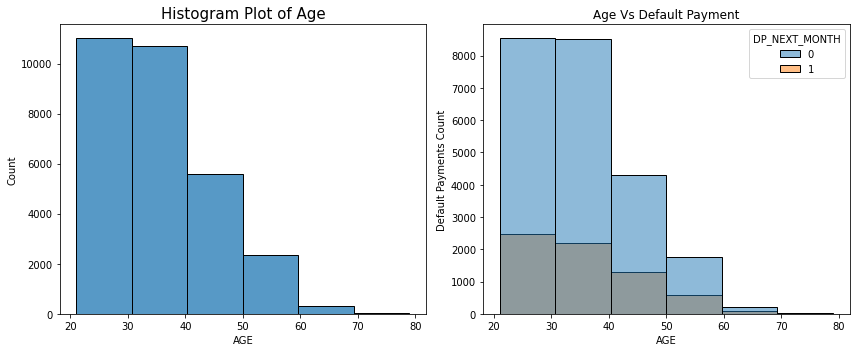

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(12,5))

# Distribution analysis of Age
hist = sns.histplot(clients_df['AGE'],bins=6, ax=ax[0])
hist.set_title('Histogram Plot of Age', size=15)

# Bi-variate analysis
# Age Vs Default Payment
hist = sns.histplot(data=clients_df, x='AGE', hue='DP_NEXT_MONTH', bins=6, ax=ax[1])
hist.set(title='Age Vs Default Payment',ylabel='Default Payments Count')

plt.tight_layout()
plt.show()

**Observation:**

* With the increase in age the count of customers decreases. Most of the customers belong to the 20-30 year age group followed by the 30-40 age group.
* With an increase in the age group the count of default payments decreases.

### **4.8 Columns: 'Payment History'**

In [ ]:
# Melt the dataset to transform the categorical columns to rows
melted_df = clients_df.melt(value_vars=['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], var_name='Category', value_name='Value')

# Group the data by category and value and count the number of occurrences
grouped_df = melted_df.groupby(['Category', 'Value']).size().reset_index(name='Count')

# Create a dictionary to rename old values to new values
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months,
# … 8=payment delay for eight months, 9=payment delay for nine months and above)
value_map = {-2:'no consumption', -1:'paid', 0:'revolving credit', 1:'1 month delay', 2:'2 month delay', 3:'3 month delay',
              4:'4 month delay', 5:'5 month delay', 6:'6 month delay', 7:'7 month delay', 8:'8 month delay', 9:'9 month and more delay'}

# Replace the old values with the new values
grouped_df['Value'] = grouped_df['Value'].replace(value_map)

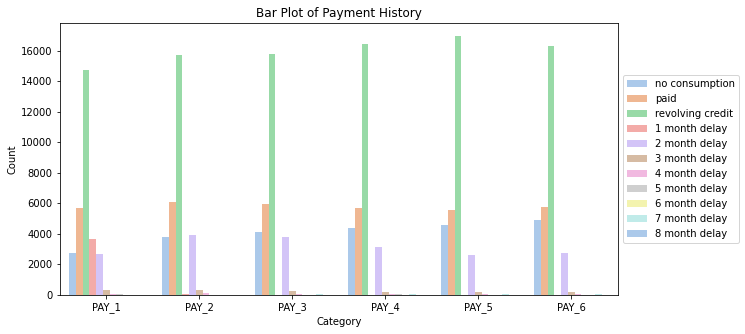

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

# Univariate analysis
bar = sns.barplot(data=grouped_df, x='Category', y='Count',palette='pastel', hue='Value')
bar.set_title('Bar Plot of Payment History')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

**Observation:**

* In every month's payment history, most customers are from revolving credit followed by paid.
* Customers with payment delay in all the payment history have the most number in 2-month payment delay means a 2-month payment delay is a critical sign of the default of the payment.

### **4.9 Columns: 'Bill Amounts'**

In [ ]:
# Creating few columns to consolidate all the bill amounts
clients_df['Sum_all_bill'] = clients_df['BILL_AMT1']+clients_df['BILL_AMT2']+clients_df['BILL_AMT3']+\
                             clients_df['BILL_AMT4']+clients_df['BILL_AMT5']+clients_df['BILL_AMT6']

clients_df['Avg_bill'] =    (clients_df['BILL_AMT1']+clients_df['BILL_AMT2']+clients_df['BILL_AMT3']+\
                             clients_df['BILL_AMT4']+clients_df['BILL_AMT5']+clients_df['BILL_AMT6'])/6

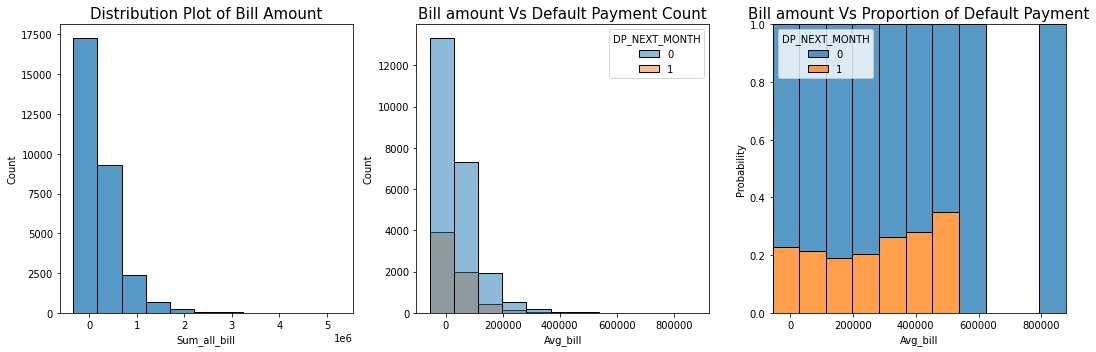

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Distribution analysis of Bill Amount
hist = sns.histplot(clients_df['Sum_all_bill'],bins=11, ax=ax[0])
hist.set_title('Distribution Plot of Bill Amount', size=15)

# Bi-variate analysis
# Bill amount Vs Default Payment Count
hist = sns.histplot(data=clients_df, x='Avg_bill', hue='DP_NEXT_MONTH',bins=11, ax=ax[1])
hist.set_title('Bill amount Vs Default Payment Count', size=15)

# Bi-variate analysis
# Bill amount Vs Proportion of Default Payment
hist = sns.histplot(data=clients_df, x='Avg_bill', hue='DP_NEXT_MONTH', bins=11, multiple='fill', stat='probability', ax=ax[2])
hist.set_title('Bill amount Vs Proportion of Default Payment', size=15)

plt.tight_layout()
plt.show()

**Observation:**

* In all the bill amounts there are some negative bill amount records means the bill amount value is less than zero.
* Most of the defaults are from customers who have negative and up to 2 lakh bill amount on an average in the last 6 months.
* But if we compare the bill amount with default payment, the proportion of default payment rises with the rise in the average bill amount.


### **4.10 Columns: 'Pay Amounts'**

In [ ]:
# Creating few columns to consolidate all the bill amounts
clients_df['Sum_all_pay_amount'] = clients_df['PAY_AMT1']+clients_df['PAY_AMT2']+clients_df['PAY_AMT3']+\
                             clients_df['PAY_AMT4']+clients_df['PAY_AMT5']+clients_df['PAY_AMT6']

clients_df['Avg_pay_amount'] =    (clients_df['PAY_AMT1']+clients_df['PAY_AMT2']+clients_df['PAY_AMT3']+\
                             clients_df['PAY_AMT4']+clients_df['PAY_AMT5']+clients_df['PAY_AMT6'])/6

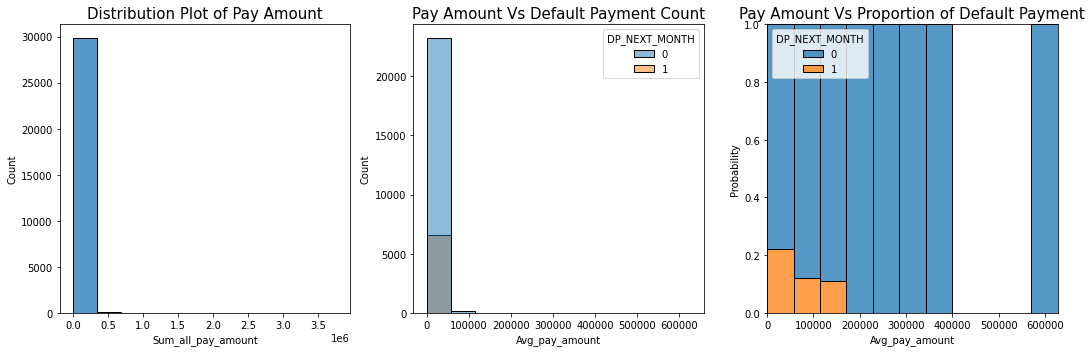

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Distribution analysis of Pay Amount
hist = sns.histplot(clients_df['Sum_all_pay_amount'],bins=11, ax=ax[0])
hist.set_title('Distribution Plot of Pay Amount', size=15)

# Bi-variate analysis
# Pay amount Vs Default Payment Count
hist = sns.histplot(data=clients_df, x='Avg_pay_amount', hue='DP_NEXT_MONTH',bins=11, ax=ax[1])
hist.set_title('Pay Amount Vs Default Payment Count', size=15)

# Bi-variate analysis
# Pay amount Vs Proportion of Default Payment
hist = sns.histplot(data=clients_df, x='Avg_pay_amount', hue='DP_NEXT_MONTH', bins=11, multiple='fill', stat='probability', ax=ax[2])
hist.set_title('Pay Amount Vs Proportion of Default Payment', size=15)

plt.tight_layout()
plt.show()

**Observation:**

* In all the pay amounts most of the paid amount is up to 50000.
* We have seen bill amounts up to 2 lacks but the pay amount is not averaged up to 2 lakh which is obvious because default payment occurs when the customer does not pay the credit card bill.
* If we compare the pay amount with the default payment, the proportion of default payment decreases with the rise in the payment amount.


## **5. Data Cleaning**

#### **What is data cleaning?**
* Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

### **5.1 Duplicate Values**

In [ ]:
# counting duplicate values
clients_df.duplicated().sum()

0

There is no duplicate record in the dataset

### **5.2 Missing Values**

**Why dealing with missing values is necessary?**

Real-world data often contains numerous missing values, which can be due to data corruption or other factors. As many machine-learning algorithms do not support missing values, it is necessary to handle them during the dataset pre-processing stage. Thus, the first step in dealing with missing data is to identify the missing values.

In [ ]:
# Missing Values/Null Values Count
print(clients_df.isnull().sum())

ID                    0
LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_1                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
BILL_AMT1             0
BILL_AMT2             0
BILL_AMT3             0
BILL_AMT4             0
BILL_AMT5             0
BILL_AMT6             0
PAY_AMT1              0
PAY_AMT2              0
PAY_AMT3              0
PAY_AMT4              0
PAY_AMT5              0
PAY_AMT6              0
DP_NEXT_MONTH         0
Sum_all_bill          0
Avg_bill              0
Sum_all_pay_amount    0
Avg_pay_amount        0
dtype: int64


<AxesSubplot:>

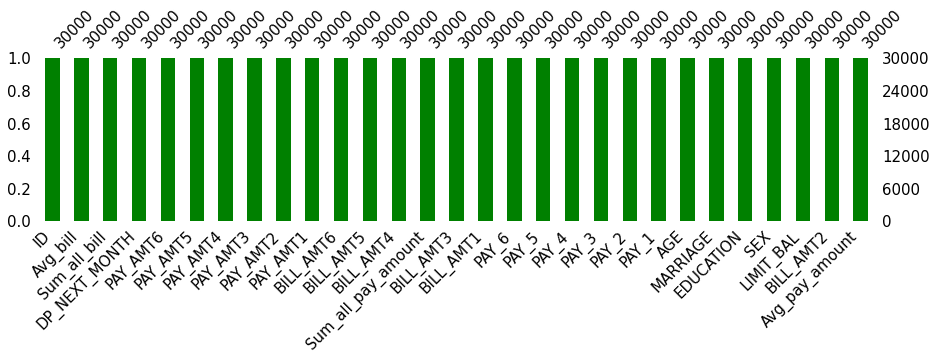

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(clients_df, color='green',sort='ascending', figsize=(15,3), fontsize=15)

Fortunately there is no missing value in the dataset

### **5.3 Skewness**

In [ ]:
# statistical summary
clients_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.000000,7500.750000,15000.500000,22500.250000,3.000000e+04
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.000000,50000.000000,140000.000000,240000.000000,1.000000e+06
SEX,30000.0,1.603733,0.489129,1.000000,1.000000,2.000000,2.000000,2.000000e+00
EDUCATION,30000.0,1.853133,0.790349,0.000000,1.000000,2.000000,2.000000,6.000000e+00
MARRIAGE,30000.0,1.551867,0.521970,0.000000,1.000000,2.000000,2.000000,3.000000e+00
AGE,30000.0,35.485500,9.217904,21.000000,28.000000,34.000000,41.000000,7.900000e+01
PAY_1,30000.0,-0.016700,1.123802,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00
PAY_2,30000.0,-0.133767,1.197186,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00
PAY_3,30000.0,-0.166200,1.196868,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00
PAY_4,30000.0,-0.220667,1.169139,-2.000000,-1.000000,0.000000,0.000000,8.000000e+00


As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers.

In [ ]:
numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 15 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in clients_df.columns:
  if clients_df[col].nunique() > 15:
    numerical_features.append(col)
  else:
    categorical_features.append(col)

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Sum_all_bill', 'Avg_bill', 'Sum_all_pay_amount', 'Avg_pay_amount']
Categorical Features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DP_NEXT_MONTH']


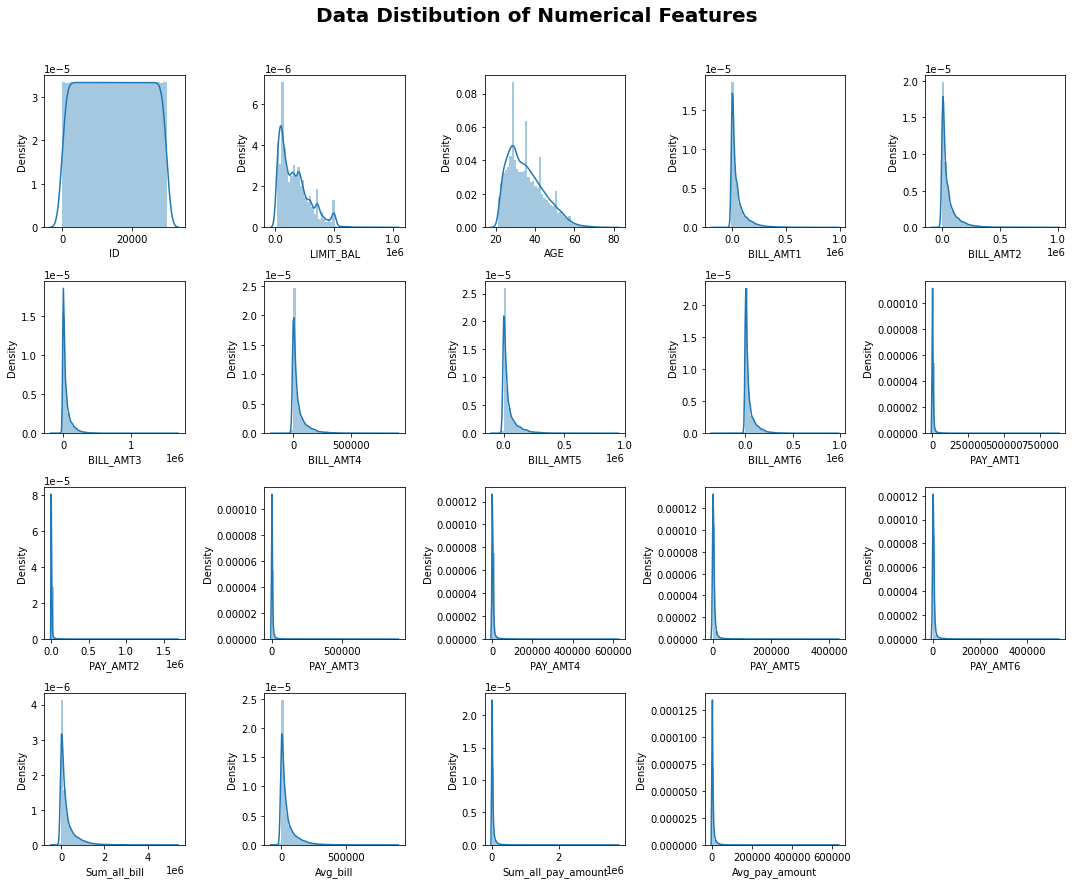

In [ ]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)                       # subplots 4 rows, 5 columns

  # dist plots
  sns.distplot(clients_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:**
* For numerical features, we can see that the majority of distributions are right-skewed. The distribution of all the bill amounts and pay amounts is highly skewed to the right. It demonstrates that these columns have many outliers.
* Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we will get rid of outliers, and then we check to see if we need to use the transformation technique again.

### **5.4 Treating Outliers**

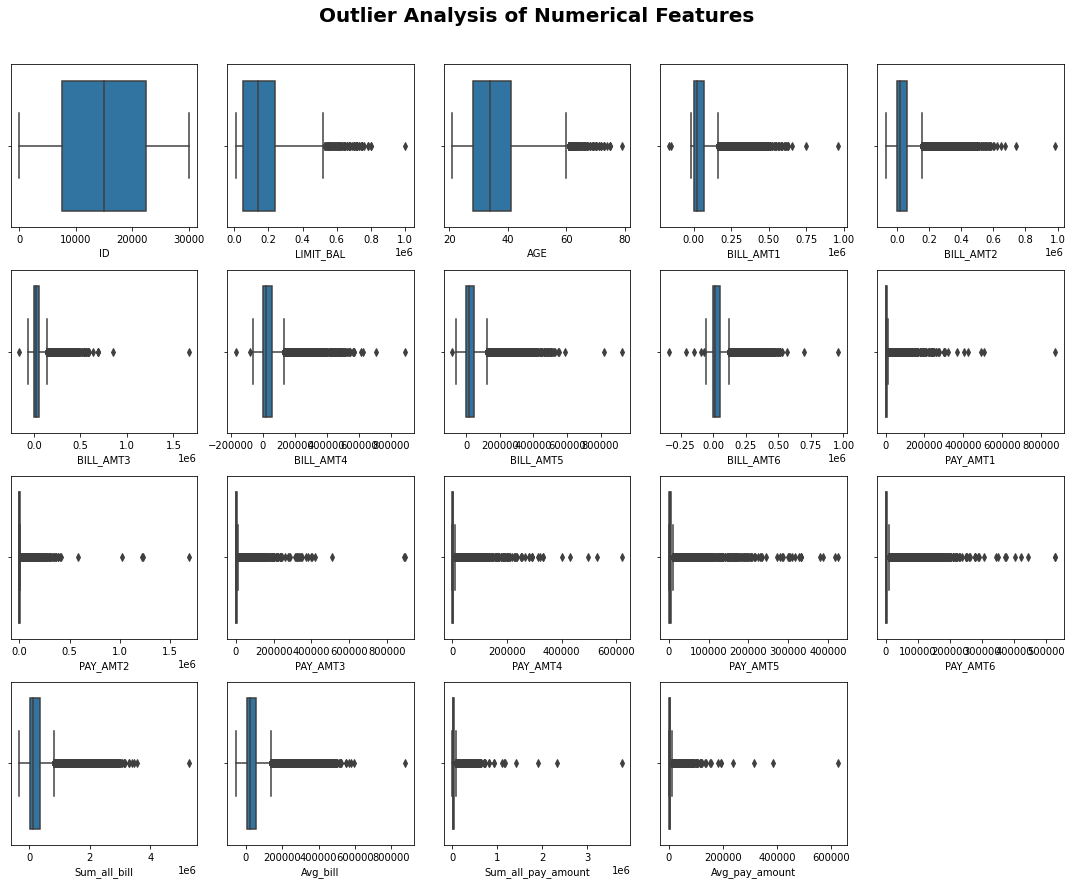

In [ ]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(clients_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:**
* Outliers are visible in the all the bill amounts features and all the pay amounts features, and 'LIMIT_BAL' columns.

**Clipping Method:** In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [ ]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(clients_df):
    for col in clients_df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = clients_df[col].quantile(0.25)
        q3 = clients_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        clients_df[col] = clients_df[col].clip(lower_bound, upper_bound)
    return clients_df

In [ ]:
# using the function to treat outliers
clients_df = clip_outliers(clients_df)

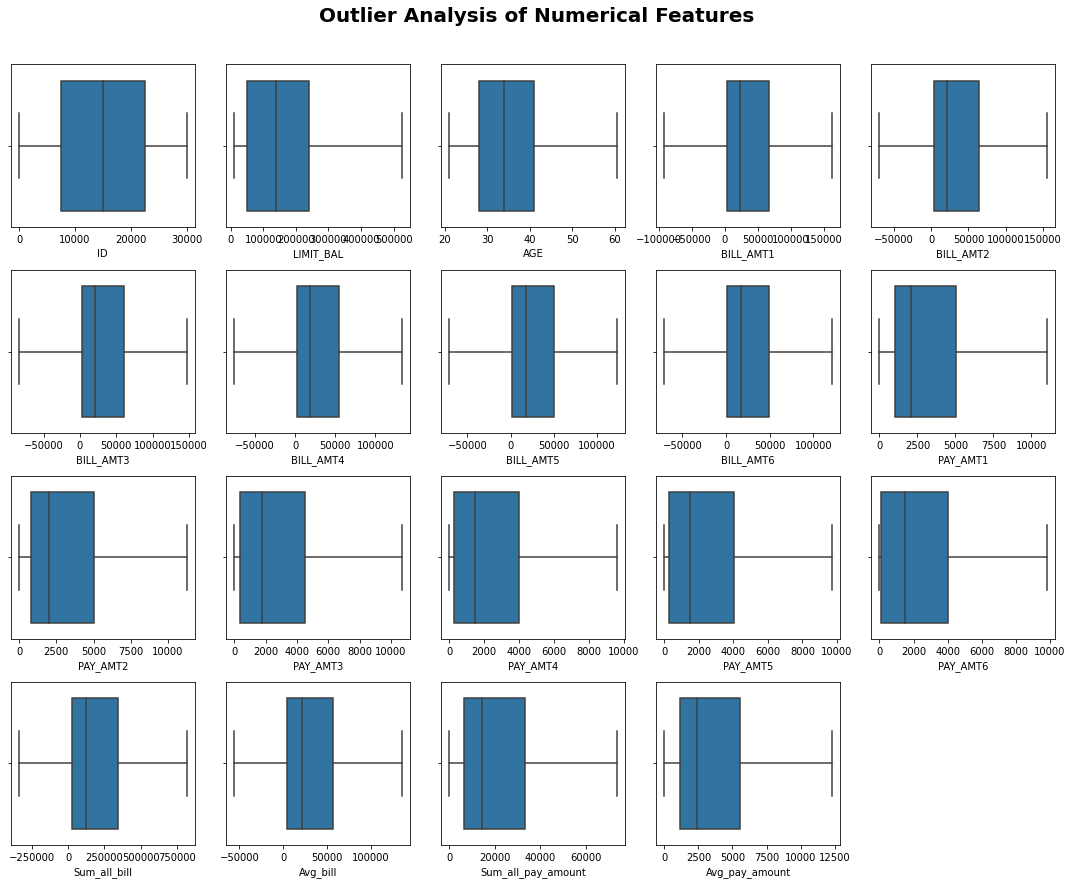

In [ ]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(clients_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

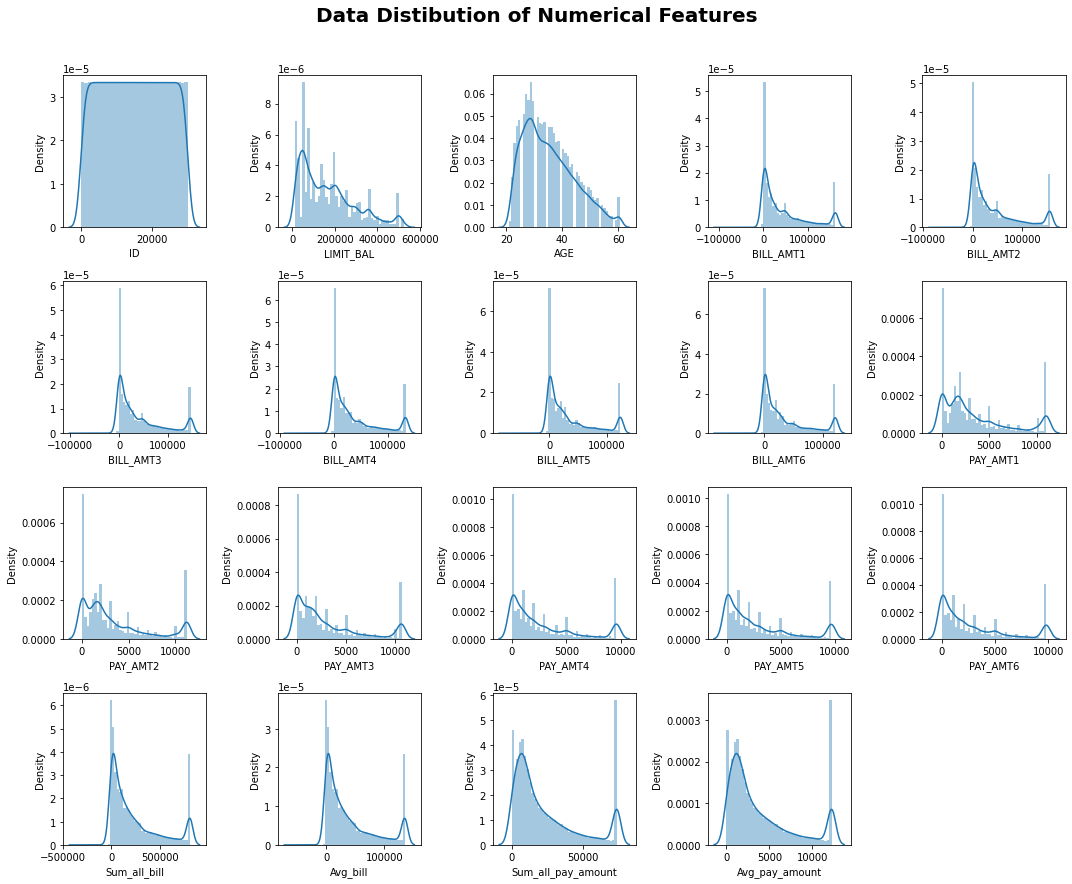

In [ ]:
# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)                       # subplots 4 rows, 5 columns

  # dist plots
  sns.distplot(clients_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

* We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

## **6. Hypothesis Testing**

Based on chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through codes and statistical testings.

Creating a class to calculate mean, median, variance, P value and all other metrics required for the calculation of hypothesis testing.

In [ ]:
# Creating Parameter Class
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

1. Men not defaulting are more than or equal to 40 years of AGE.
2. Customers defaulting have limit balance less than 100000.
3. Customers defaulting have total last bill amount of 50000.

In all of the hypothesis tests in this notebook, we will use a significance level of α = 0.05

### **6.1 Hypothetical Statement - 1**
Men not defaulting are more than or equal to 40 years of AGE.

State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 40

Alternate Hypothesis : N < 40

Test Type: Left Tailed Test


In [ ]:
# Perform Statistical Test to obtain P-Value

# SEX:
# 1 = male; 2 = female

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default

hypo_1 = clients_df[(clients_df['SEX']==1) & (clients_df["DP_NEXT_MONTH"]==0)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 40
sample_mean = hypo_1["AGE"].mean()
size = len(hypo_1)
std=(variance(hypo_1["AGE"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="AGE")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.224874903389824e-307


##### Which statistical test have you done to obtain P-Value?

I used Z-Test as the statistical testing to get the P-Value, and the results showed that the null hypothesis could not be rejected, and male customers who didn't default were over 40 years old.

##### Why did you choose the specific statistical test?

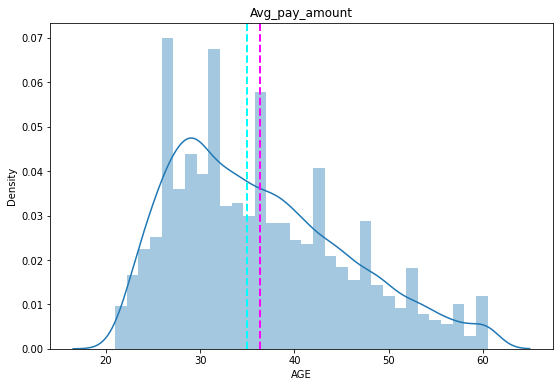

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["AGE"])
sns.distplot(hypo_1["AGE"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_1["AGE"].mean()- hypo_1["AGE"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 1.3807542983915724


The figure demonstrates that the mean and median are roughly equivalent; the difference between them is 1.38 (less than 10). As a result, the distribution is normal. I have used Z-Test directly as a result.

We have failed to reject the null hypothesis that N < 40

### **6.2 Hypothetical Statement - 2**
Customers defaulting have limit balance less than 100000

State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 100000

Alternate Hypothesis : N > 100000

Test Type: Right Tailed Test


In [ ]:
# Perform Statistical Test to obtain P-Value

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default
hypo_2=clients_df[(clients_df["DP_NEXT_MONTH"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 100000
sample_mean = hypo_2["LIMIT_BAL"].mean()
size = len(hypo_2)
std=(variance(hypo_2["LIMIT_BAL"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='r',t="true",hypothesis_number=hypothesis_number,df=hypo_2,col="LIMIT_BAL")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 3.8965627243872233e-97


##### Which statistical test have you done to obtain P-Value?

I used T-Test as the statistical testing to get the P-Value, and the result showed that the null hypothesis was wrong and that customers who defaulted had a limit balance of less than 100,000.

##### Why did you choose the specific statistical test?

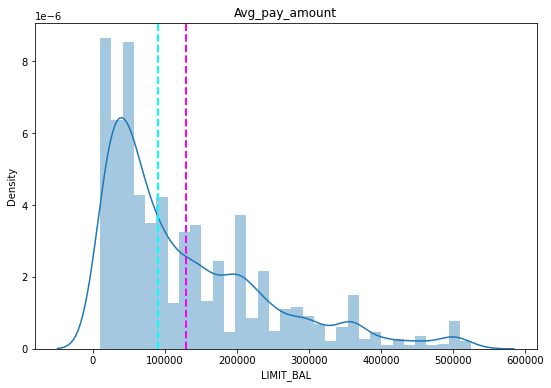

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_2["LIMIT_BAL"])
sns.distplot(hypo_2["LIMIT_BAL"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_2["LIMIT_BAL"].mean()- hypo_2["LIMIT_BAL"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 39885.87703435804


The graph above demonstrates that the median is greater than the mean above 10,000. As a result, the distribution is positively skewed. Z-Test cannot be used with skewed data.

For small studies, non-parametric tests are most useful. In large studies, the use of non-parametric tests may answer the wrong question, causing readers confusion. Even with heavily skewed data, t-tests and the confidence intervals that go along with them should be used in studies with large sample sizes.

Therefore, the T-test can yield better results for skewed data. So, I used the t-test.

### **6.3 Hypothetical Statement - 3**
Customers defaulting have total last bill amount of 50000.

State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 50000

Alternate Hypothesis : N != 50000

Test Type: Two Tailed test


In [ ]:
# Perform Statistical Test to obtain P-Value

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default
hypo_3=clients_df[(clients_df["DP_NEXT_MONTH"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 50000
sample_mean = hypo_3["BILL_AMT1"].mean()
size = len(hypo_3)
std=(variance(hypo_3["BILL_AMT1"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=hypo_3,col="BILL_AMT1")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 7.733467494479464e-44


##### Which statistical test have you done to obtain P-Value?

I used T-Test as the statistical testing to get the P-Value, and the result showed that the null hypothesis could not be rejected, so the statement that "Customers defaulted with a total last bill amount of 50,000" was correct.

##### Why did you choose the specific statistical test?

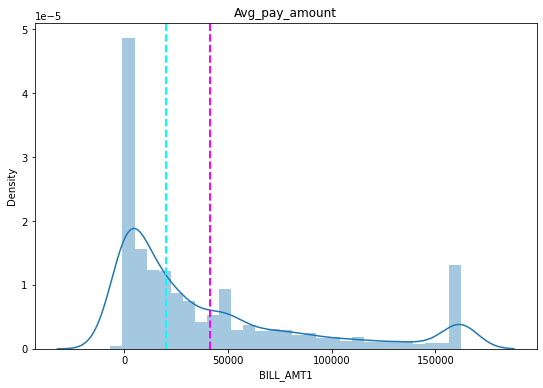

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_3["BILL_AMT1"])
sns.distplot(hypo_3["BILL_AMT1"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_3["BILL_AMT1"].median()- hypo_3["BILL_AMT1"].mean()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- -21314.14931811332


The graph above demonstrates that the median is greater than the mean above 10,000. As a result, the distribution is positively skewed Z-Test cannot be used with skewed data.

For small studies, nonparametric tests are most useful. In large studies, the use of non-parametric tests may answer the wrong question, causing readers confusion. Even with heavily skewed data, t-tests and the confidence intervals that go along with them should be used in studies with large sample sizes.

Therefore, the T-test can yield better results for skewed data. So, I used the t-test.

## **7. Feature Engineering**

* Feature engineering is the process of creating new features from existing ones to improve the performance of a machine-learning model. This involves transforming raw data into a more useful and informative form, by either creating new features from the existing data or selecting only the most relevant features from the raw data.
* The goal of feature engineering is to extract relevant information from the raw data and represent it in a way that can be easily understood by the machine learning model. The success of a machine learning model depends heavily on the quality of the features used as inputs, so feature engineering plays an important role in model performance.

### **7.1 Feature Manipulation**

In [ ]:
# copying this data to protect the work done till now
df_feature = clients_df.copy()

In [ ]:
numerical_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 15 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in df_feature.columns:
  if df_feature[col].nunique() > 15:
    numerical_features.append(col)
  else:
    categorical_features.append(col)

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Sum_all_bill', 'Avg_bill', 'Sum_all_pay_amount', 'Avg_pay_amount']
Categorical Features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DP_NEXT_MONTH']


#### **7.1.1 Bill_AMT**

* Negative bill amounts are not possible in a credit card dataset as a bill represents the amount of money that the credit card holder owes to the bank. It is always a positive value. However, negative values can occur due to data entry errors or other issues. Hence we are dropping all negative bill amount instances.

In [ ]:
df_feature = df_feature[df_feature['BILL_AMT1'] >= 0]

#### **7.1.2 EDUCATION**

* The education column has a lot of unknown sub-categories so combining them into one sub-category.

In [ ]:
# Checking the value counts of each sub-category of EDUCATION
df_feature['EDUCATION'].value_counts()

2    13815
1    10301
3     4835
5      278
4      116
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
# Lambda Function can be used to convert all unknown sub-category as one unknown sub-category
df_feature['EDUCATION'] = df_feature['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)

In [ ]:
# Cheking the result
df_feature['EDUCATION'].value_counts()

2    13815
1    10301
3     4835
4      459
Name: EDUCATION, dtype: int64

### **7.2 Encoding**

In [ ]:
# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("No. of unique values in",i,"is",df_feature[i].nunique())

No. of unique values in SEX is 2
No. of unique values in EDUCATION is 4
No. of unique values in MARRIAGE is 4
No. of unique values in PAY_1 is 11
No. of unique values in PAY_2 is 11
No. of unique values in PAY_3 is 11
No. of unique values in PAY_4 is 11
No. of unique values in PAY_5 is 10
No. of unique values in PAY_6 is 10
No. of unique values in DP_NEXT_MONTH is 2


In [ ]:
# dropping our target variable from categorical features list
categorical_features.remove('DP_NEXT_MONTH')

In [ ]:
# checking the data type of each feature
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29410 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  29410 non-null  int64  
 1   LIMIT_BAL           29410 non-null  float64
 2   SEX                 29410 non-null  int64  
 3   EDUCATION           29410 non-null  int64  
 4   MARRIAGE            29410 non-null  int64  
 5   AGE                 29410 non-null  float64
 6   PAY_1               29410 non-null  int64  
 7   PAY_2               29410 non-null  int64  
 8   PAY_3               29410 non-null  int64  
 9   PAY_4               29410 non-null  int64  
 10  PAY_5               29410 non-null  int64  
 11  PAY_6               29410 non-null  int64  
 12  BILL_AMT1           29410 non-null  float64
 13  BILL_AMT2           29410 non-null  float64
 14  BILL_AMT3           29410 non-null  float64
 15  BILL_AMT4           29410 non-null  float64
 16  BILL

**Observation**
* All the categorical columns have already been encoded, we just need to convert the categorical column data type as an object or category.

In [ ]:
# Cast values in the categorical columns as type str.                 # can use astype('category') too.
df_feature[categorical_features] = df_feature[categorical_features].astype(str)

# checking the result
df_feature.dtypes

ID                      int64
LIMIT_BAL             float64
SEX                    object
EDUCATION              object
MARRIAGE               object
AGE                   float64
PAY_1                  object
PAY_2                  object
PAY_3                  object
PAY_4                  object
PAY_5                  object
PAY_6                  object
BILL_AMT1             float64
BILL_AMT2             float64
BILL_AMT3             float64
BILL_AMT4             float64
BILL_AMT5             float64
BILL_AMT6             float64
PAY_AMT1              float64
PAY_AMT2              float64
PAY_AMT3              float64
PAY_AMT4              float64
PAY_AMT5              float64
PAY_AMT6              float64
DP_NEXT_MONTH           int64
Sum_all_bill          float64
Avg_bill              float64
Sum_all_pay_amount    float64
Avg_pay_amount        float64
dtype: object

### **7.3 Correlation Coefficient and Heatmap**

* The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

* The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

<AxesSubplot:>

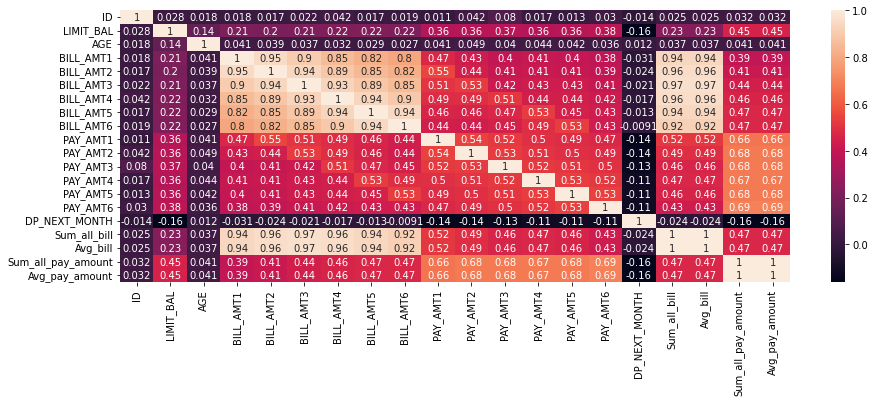

In [ ]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df_feature.corr(), annot=True)

In [ ]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# checking the highly correlated features
correlation(df_feature, 0.7)          # setting threshold of 0.7

{'Avg_bill',
 'Avg_pay_amount',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'Sum_all_bill'}

In [ ]:
# droping columns due to multi-collinearity

df_feature.drop(['Avg_bill','Avg_pay_amount','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','Sum_all_bill'], axis=1, inplace=True)

<AxesSubplot:>

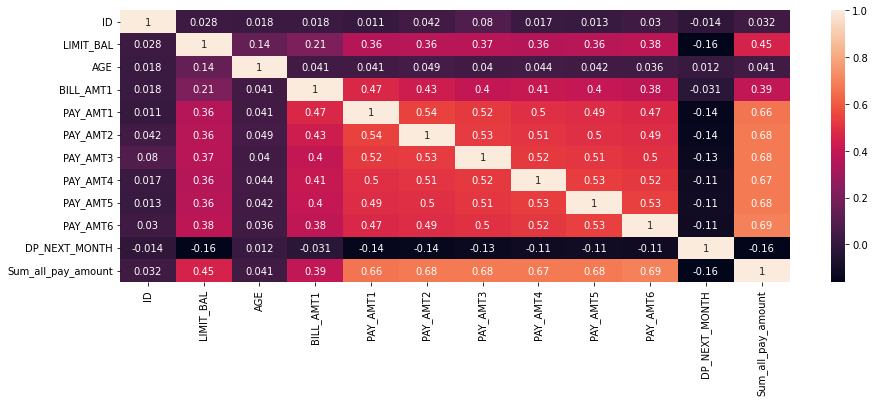

In [ ]:
# Plotting correlation heatmap again
plt.figure(figsize=(15,5))
sns.heatmap(df_feature.corr(), annot=True)

### **7.4 Feature Selection**

Feature selection is a technique in machine learning where you select a subset of the most important features from a larger set of features to use as inputs for a model. The goal of feature selection is to reduce the number of features used in the model, while retaining the most important and relevant information from the data.

* Dropping unnecessary columns

In [ ]:
# dropping the ID column
df_feature.drop('ID',axis = 1, inplace = True)

# Dropping Sum_all_pay_amount because it was created for EDA
df_feature.drop(['Sum_all_pay_amount'],axis=1, inplace=True)

### **7.5 Handling Imbalance**

Checking if our target variable is balanced or not

0    22883
1     6527
Name: DP_NEXT_MONTH, dtype: int64
 


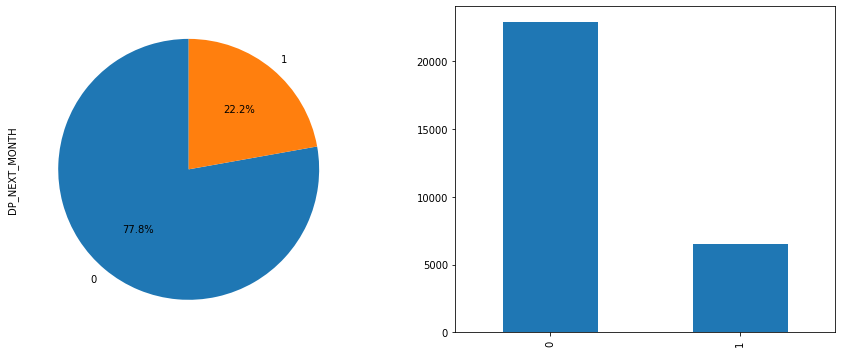

In [ ]:
# Dependant Column Value Counts
print(df_feature.DP_NEXT_MONTH.value_counts())
print(" ")

# Dependant Variable Column Visualization
fig,ax = plt.subplots(1,2, figsize=(15,6))

# pie chart for percentage
df_feature['DP_NEXT_MONTH'].value_counts().plot(kind='pie',autopct="%1.1f%%",startangle=90, ax=ax[0])

# bar chart for count
df_feature['DP_NEXT_MONTH'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

When there are significantly more instances of certain classes than others, the issue of class imbalance typically arises. Class imbalance in the target class is a problem for machine learning models because it can result in biased predictions. That is why we need to balance the target class.

**The data set differs significantly. Our data, therefore, lack balance. We will use the Synthetic Minority Oversampling Technique (SMOTE) to resolve this issue.**
* SMOTE (Synthetic Minority Oversampling Technique) works by randomly selecting a minority class point and calculating its k-nearest neighbors. Between the selected point and its neighbors, the synthetic points are added. Continue with the steps until the data is balanced.

In [ ]:
## Handling target class imbalance using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

X = df_feature.drop(columns='DP_NEXT_MONTH')     # independent features
y = df_feature['DP_NEXT_MONTH']                  # dependent features

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)

# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 22883, 1: 6527})
After Handling Imbalanced class Counter({1: 22883, 0: 22883})


We have successfully balanced the target variable

## **8. Model Building**

### **8.1 Train Test Split**

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(36612, 18)
(9154, 18)


### **8.2 Scaling Data**

In [ ]:
# Scaling Data

# Initialize the scaler
scaler = StandardScaler()

# Scale the features using StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **8.3 Evaluation Metrics Used**

* <b>Accuracy:</b> Simply put, accuracy is the percentage of times that the classifier correctly predicts. The ratio of the total number of predictions to the number of correct predictions is how accuracy is defined. If a model has a 99 percent accuracy rate, you might think it is doing very well. However, this is not always the case and can be misleading in some situations.
When the target class is well-balanced, accuracy is useful, but it is not a good choice for unbalanced classes.

* <b>Confusion Matrix:</b> The Confusion Matrix is a performance measurement for classification problems in machine learning in which there can be two or more classes output. It is a table with actual and predicted value combinations. The table that is frequently used to describe the performance of a classification model on a set of test data for which the true values are known is referred to as a confusion matrix. It is extremely helpful for determining the AUC-ROC curves, precision, recall, and accuracy.

* <b>Precision:</b> Precision explains the percentage of correctly predicted cases that were actually successful. When False Positives are more of a concern than False Negatives, precision can be useful.
A label's precision is calculated by dividing the number of predicted positives by the number of true positives.

* <b>Recall:</b> Recall describes the proportion of actual positive cases that our model correctly predicted. When False Negative is more important than False Positive, this metric is helpful. In medical cases, it matters whether we raise a false alarm or not, but the actual positive cases should not go unnoticed. The number of true positives divided by the total number of actual positives is the definition of recall for a label.

* <b>F1 Score:</b> This score incorporates both Precision and Recall metrics. When Precision and Recall are equal, it reaches its peak.
The harmonic mean of recall and precision is the F1 Score.

* <b>AUC-ROC:</b> The Receiver Operator Characteristic (ROC) is a probability curve that separates the "signal" from the "noise" by plotting the TPR (True Positive Rate) against the FPR (False Positive Rate) at various threshold values. The measure of a classifier's ability to differentiate between classes is the Area Under the Curve (AUC). This simply indicates that the classifier is able to precisely differentiate between all Positive and Negative class points when AUC is equal to 1. The classifier would correctly identify all negatives as positives when the AUC was zero.

### **8.4 Model Training**

In [ ]:
# empty list for appending performance metric score
model_result = []

def predict(ml_model, model_name):

  '''
  Pass the model and predict value.
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  '''

  # model fitting
  model = ml_model.fit(X_train, y_train)

  # predicting value and probability
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]


  ''' Performance Metrics '''
  # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')

  # f1 score  ---->  Harmonic Mean of Precision and Recall
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')

  # roc_auc score  ---->  It shows how well the model can differentiate between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  # classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)


  ''' plotting Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)

  '''Calculate threshold values for K-S chart'''

  # Compute the false positive rate, true positive rate, and thresholds for the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

  # Calculate the maximum difference between the true positive rate and false positive rate
  ks_stat = tpr - fpr

  # Compute the threshold that maximizes the difference between the false positive rate and the true positive rate
  ks_threshold = thresholds[np.argmax(ks_stat)]

  # Plot the KS chart
  plt.plot(thresholds, tpr, label='True Positive Rate')
  plt.plot(thresholds, fpr, label='False Positive Rate')
  plt.plot(thresholds, ks_stat, label='KS Statistic')
  plt.axvline(ks_threshold, color='black', linestyle='--', label=f'KS Threshold: {ks_threshold:.2f}')
  plt.title('KS Chart')
  plt.xlabel('Threshold')
  plt.ylabel('Rate')
  plt.legend()
  plt.show()


  '''Using the score from the performance metrics to create the final model_result'''
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy,
                       'test_accuracy':test_accuracy,
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})

## **9. Model Implementation**

### **9.1 Logistic Regression**

Logistic regression is one of the simplest algorithms for estimating the relationship between independent variables and a single dependent binary variable and determining the likelihood of an event occurring.

The regulation parameter C controls the trade-off between keeping the model simple (underfitting) and increasing its complexity (overfitting). With increasing values of C, the model becomes more complicated and the power of regulation decreases, resulting in an overfitting of the data.

train accuracy : 0.685
test accuracy : 0.685
train precision : 0.691
test precision : 0.691
train recall : 0.667
test recall : 0.67
train f1 : 0.679
test f1 : 0.68
train roc_auc : 0.749
test roc_auc : 0.75
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      4569
           1       0.69      0.67      0.68      4585

    accuracy                           0.68      9154
   macro avg       0.69      0.68      0.68      9154
weighted avg       0.69      0.68      0.68      9154

--------------------------------------------------------------------------------


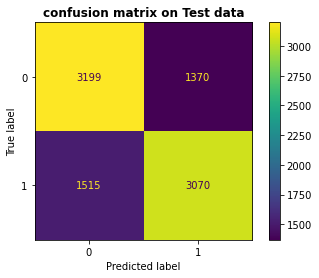

--------------------------------------------------------------------------------
           11269  29108  1900   25071  681    8993   44799  1219   7679   \
y_actual       0      0      0      0      0      1      1      0      0   
y_predict      0      0      1      0      1      0      1      0      0   

           14092  
y_actual       0  
y_predict      0  
--------------------------------------------------------------------------------


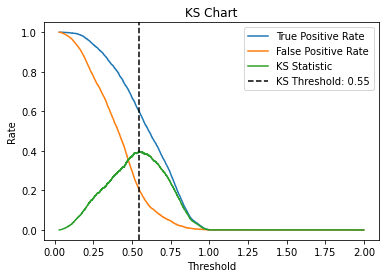

In [ ]:
predict(LogisticRegression(), 'LogisticRegression')

### **9.2 KNN (K-Nearest Neighbours)**

A supervised machine learning algorithm known as KNN or K-nearest neighbor can be used to solve classification and regression problems. K is not a non-parametric nearest neighbor, i.e. It makes no assumptions regarding the assumptions that underlie the data. An input or unseen data set is categorized here by the algorithm based on the characteristics shared by the closest data points. The distance between two points determines these closest neighbors. The distance metric methods that are utilized can be Euclidean Distance, Manhattan Distance, Minkowski, Cosine Similarity Measure etc)

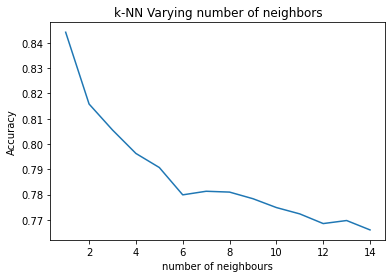

In [ ]:
# Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(knn.score(X_test, y_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

The best accuracy is at K=1. So we will concentrate on low values of k.

train accuracy : 1.0
test accuracy : 0.844
train precision : 1.0
test precision : 0.806
train recall : 1.0
test recall : 0.908
train f1 : 1.0
test f1 : 0.854
train roc_auc : 1.0
test roc_auc : 0.844
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      4569
           1       0.81      0.91      0.85      4585

    accuracy                           0.84      9154
   macro avg       0.85      0.84      0.84      9154
weighted avg       0.85      0.84      0.84      9154

--------------------------------------------------------------------------------


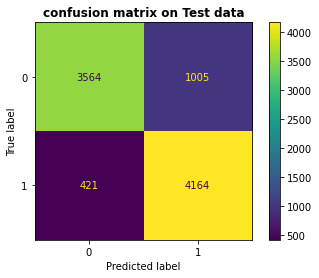

--------------------------------------------------------------------------------
           11269  29108  1900   25071  681    8993   44799  1219   7679   \
y_actual       0      0      0      0      0      1      1      0      0   
y_predict      1      0      0      0      0      1      1      0      0   

           14092  
y_actual       0  
y_predict      0  
--------------------------------------------------------------------------------


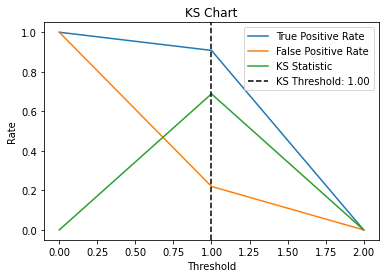

In [ ]:
predict(KNeighborsClassifier(n_neighbors=1), 'KNN')

### **9.3 Decision Tree**

A decision tree is a tree-like model used in machine learning to make predictions or decisions by breaking down a set of rules or conditions into smaller and smaller sub-conditions, based on the values of the input features.

Each node in the tree represents a test on a feature, and each branch represents the outcome of the test. The final branches of the tree, called the leaves, represent the class predictions or decisions. The tree is built recursively by finding the best feature to split the data based on the information gain or decrease in impurity at each node.

train accuracy : 1.0
test accuracy : 0.805
train precision : 1.0
test precision : 0.799
train recall : 0.999
test recall : 0.814
train f1 : 1.0
test f1 : 0.807
train roc_auc : 1.0
test roc_auc : 0.805
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4569
           1       0.80      0.81      0.81      4585

    accuracy                           0.80      9154
   macro avg       0.80      0.80      0.80      9154
weighted avg       0.80      0.80      0.80      9154

--------------------------------------------------------------------------------


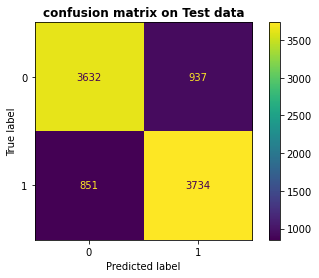

--------------------------------------------------------------------------------
           11269  29108  1900   25071  681    8993   44799  1219   7679   \
y_actual       0      0      0      0      0      1      1      0      0   
y_predict      1      0      0      0      1      1      1      0      0   

           14092  
y_actual       0  
y_predict      0  
--------------------------------------------------------------------------------


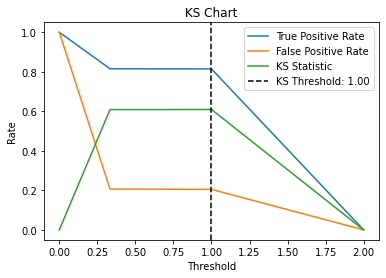

In [ ]:
predict(DecisionTreeClassifier(), 'DecisionTree')

### **9.4 Random Forest**

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their predictions to make a final classification or regression prediction. In contrast to a single decision tree, Random Forest reduces the risk of overfitting by combining the results of many trees, each built on a different subset of the data.

**Hyperparameter Tunning using RandomizedSearchCV**

In [ ]:
rf_params = {'n_estimators': [50,75],           # number of trees in the ensemble
             'max_depth': [70,80],              # maximum number of levels allowed in each tree.
             'min_samples_split': [2,5],        # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,4]}         # minimum number of samples which can be stored in a tree leaf.



# performing Hyperparameter Tunning using RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
rf_gridsearch = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, verbose=2, n_jobs=-1)

# model fitting
rf_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [70, 80], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 75]},
             verbose=2)

In [ ]:
optimal_model = rf_gridsearch.best_estimator_
optimal_model

RandomForestClassifier(max_depth=70, min_samples_leaf=3, n_estimators=75,
                       random_state=42)

train accuracy : 0.95
test accuracy : 0.874
train precision : 0.981
test precision : 0.913
train recall : 0.917
test recall : 0.827
train f1 : 0.948
test f1 : 0.868
train roc_auc : 0.996
test roc_auc : 0.934
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4569
           1       0.91      0.83      0.87      4585

    accuracy                           0.87      9154
   macro avg       0.88      0.87      0.87      9154
weighted avg       0.88      0.87      0.87      9154

--------------------------------------------------------------------------------


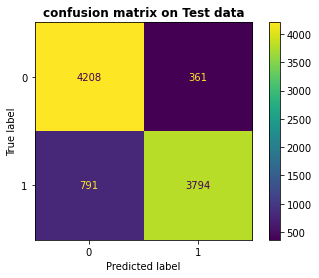

--------------------------------------------------------------------------------
           11269  29108  1900   25071  681    8993   44799  1219   7679   \
y_actual       0      0      0      0      0      1      1      0      0   
y_predict      0      0      0      0      0      0      1      0      0   

           14092  
y_actual       0  
y_predict      0  
--------------------------------------------------------------------------------


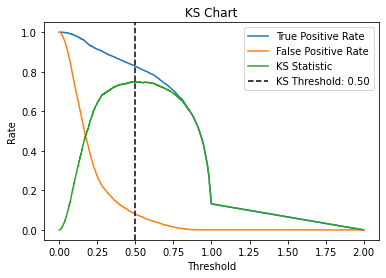

In [ ]:
optimal_model =RandomForestClassifier(max_depth=70, min_samples_leaf=3, n_estimators=75,
                       random_state=42)
predict(optimal_model, 'RandomForest')

### **9.5 AdaBoost**

AdaBoost (Adaptive Boosting) is an ensemble machine learning algorithm that combines multiple weak models to form a stronger model. It works by assigning weights to the data points in a dataset and iteratively building weak models that try to correctly classify or predict the target variable. After each iteration, the weights of the misclassified or mispredicted data points are increased, making it more likely that the next weak model will focus on these points.

train accuracy : 0.859
test accuracy : 0.855
train precision : 0.908
test precision : 0.903
train recall : 0.798
test recall : 0.796
train f1 : 0.85
test f1 : 0.847
train roc_auc : 0.917
test roc_auc : 0.913
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4569
           1       0.90      0.80      0.85      4585

    accuracy                           0.86      9154
   macro avg       0.86      0.86      0.85      9154
weighted avg       0.86      0.86      0.85      9154

--------------------------------------------------------------------------------


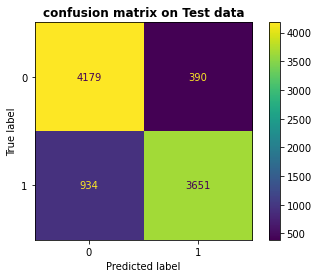

--------------------------------------------------------------------------------
           11269  29108  1900   25071  681    8993   44799  1219   7679   \
y_actual       0      0      0      0      0      1      1      0      0   
y_predict      0      0      0      0      0      0      1      0      0   

           14092  
y_actual       0  
y_predict      0  
--------------------------------------------------------------------------------


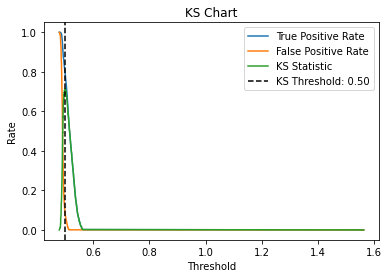

In [ ]:
predict(AdaBoostClassifier(n_estimators=40, random_state=42), 'AdaBoost')

### **9.6 XGBoost**

XGBoost (eXtreme Gradient Boosting) is an optimized implementation of the Gradient Boosting algorithm that is specifically designed for large-scale and complex data. XGBoost is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to make a final prediction.

**HyperParameter Tunning using GridSearchCV**

In [ ]:
xgb_params = {'n_estimators': [75,100],    # number of trees in the ensemble
          'max_depth': [6,9],            # maximum number of levels allowed in each tree.
          'min_samples_split': [5,7],    # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [6,8],     # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}         # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
xgb = XGBClassifier()
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)

# model fitting
xgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[05:48:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 9],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 7],
                         'n_estimators': [75, 100]},
             verbose=2)

In [ ]:
optimal_model = xgb_gridsearch.best_estimator_
optimal_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_leaf=6, min_samples_split=5,
              missing=nan, monotone_constraints=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, ...)

[05:48:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

train accuracy : 0.913
test accuracy : 0.875
train precision : 0.964
test precision : 0.926
train recall : 0.857
test recall : 0.815
train f1 : 0.907
test f1 : 0.867
train roc_auc : 0.977
test roc_auc : 0.934
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4569
           1       0.93      0.82      0.87      4585

    accuracy                           0.87      9154
   macro avg       0.88      0.87      0.87      9154
weighted avg       0.88      0.87      0.87      9154

--------------------------------------------------------------------------------


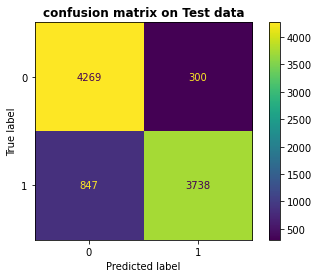

--------------------------------------------------------------------------------
           11269  29108  1900   25071  681    8993   44799  1219   7679   \
y_actual       0      0      0      0      0      1      1      0      0   
y_predict      0      0      0      0      0      0      1      0      0   

           14092  
y_actual       0  
y_predict      0  
--------------------------------------------------------------------------------


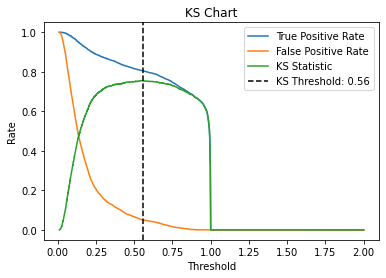

In [ ]:
predict(optimal_model, 'XGBoost')

### **9.7 Light Gradient Boosting**

LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be more efficient than traditional gradient boosting algorithms and is particularly well-suited for large datasets.LightGBM is an open-source library that was developed by Microsoft.

One of the key features of LightGBM is its use of a histogram-based approach to split nodes in decision trees.

**HyperParameter Tunning using GridSearchCV**

In [ ]:
lgb_params = {'n_estimators': [70,100],   # number of trees in the ensemble
          'max_depth': [7,9],             # maximum number of levels allowed in each tree.
          'min_samples_split': [4,5],     # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [4,6]}      # minimum number of samples which can be stored in a tree leaf.


# performing Hyperparameter Tunning using GridSearchCV
lgb = LGBMClassifier(objective='binary')
lgb_gridsearch = GridSearchCV(estimator=lgb, param_grid=lgb_params, cv=5, verbose=2, n_jobs=-1)
lgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(objective='binary'), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [7, 9],
                         'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 5],
                         'n_estimators': [70, 100]},
             verbose=2)

In [ ]:
optimal_model = lgb_gridsearch.best_estimator_
optimal_model

LGBMClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=4,
               objective='binary')

train accuracy : 0.89
test accuracy : 0.874
train precision : 0.948
test precision : 0.929
train recall : 0.825
test recall : 0.812
train f1 : 0.882
test f1 : 0.866
train roc_auc : 0.956
test roc_auc : 0.933
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4569
           1       0.93      0.81      0.87      4585

    accuracy                           0.87      9154
   macro avg       0.88      0.87      0.87      9154
weighted avg       0.88      0.87      0.87      9154

--------------------------------------------------------------------------------


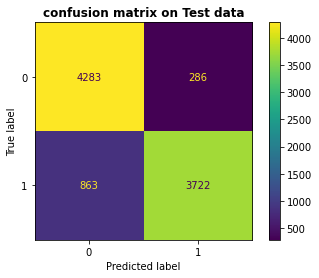

--------------------------------------------------------------------------------
           11269  29108  1900   25071  681    8993   44799  1219   7679   \
y_actual       0      0      0      0      0      1      1      0      0   
y_predict      0      0      0      0      0      0      1      0      0   

           14092  
y_actual       0  
y_predict      0  
--------------------------------------------------------------------------------


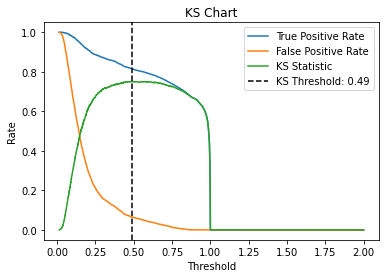

In [ ]:
predict(optimal_model, 'LightGBM')

## **10. Model Result and Conclusion**

### **10.1 Model Result**

In [ ]:
model_result = pd.DataFrame(model_result)
round(model_result,3)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_auc
0,LogisticRegression,0.685,0.685,0.691,0.691,0.667,0.670,0.679,0.680,0.749,0.750
1,KNN,1.000,0.844,1.000,0.806,1.000,0.908,1.000,0.854,1.000,0.844
2,DecisionTree,1.000,0.805,1.000,0.799,0.999,0.814,1.000,0.807,1.000,0.805
3,RandomForest,0.950,0.874,0.981,0.913,0.917,0.827,0.948,0.868,0.996,0.934
4,AdaBoost,0.859,0.855,0.908,0.903,0.798,0.796,0.850,0.847,0.917,0.913
5,XGBoost,0.913,0.875,0.964,0.926,0.857,0.815,0.907,0.867,0.977,0.934
6,LightGBM,0.890,0.874,0.948,0.929,0.825,0.812,0.882,0.866,0.956,0.933


The majority and minority of the count in our dataset come from the negative and positive, respectively. Accuracy scores aren't very helpful when dealing with imbalanced data or classes.

In order to avoid false negatives, we need to minimize situations where the model predicts that a customer will not default, when in reality, they do. Similarly, to minimize false positives, we need to increase the precision and recall scores, which will positively impact the f1_score. In our scenario, recall should take precedence over precision. Hence, we should aim for moderate f1_score and high recall scores. As a result, **the model's recall score will be the primary focus of our project.**

Balanced accuracy is a better metric than F1 when positives and negatives are equally important. When more attention is required, **F1 is an excellent scoring metric for imbalanced data.**

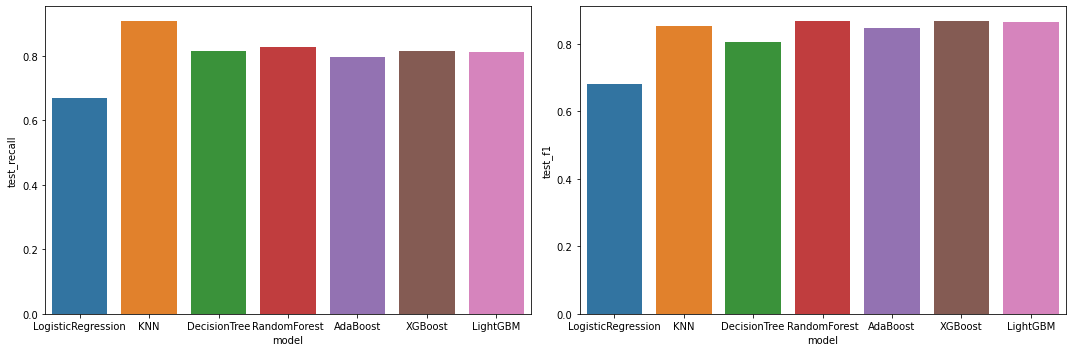

In [ ]:
# plotting graph to compaire model performance of all the models
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test_recall'], ax=axs[0])   # Model vs Recall score
sns.barplot(x=model_result['model'], y=model_result['test_f1'], ax=axs[1])       # Model vs F1 score
plt.tight_layout()

**We didn't want to mispredict a customer's default status when he has the defaulted, so the final model we chose is KNN.**

### **10.2 Model Explainability**

In [ ]:
# feature importance (Random Forest)
rf_importances = rf_gridsearch.best_estimator_.feature_importances_

#Creating a dictonary
rf_importance_dict = {'Feature RF' : list(X.columns),
                   'Feature Importance RF' : rf_importances}

#Creating the dataframe
rf_importance = pd.DataFrame(rf_importance_dict)
rf_sorting_features = rf_importance.sort_values(by=['Feature Importance RF'],ascending=False)

# feature importance (XGB)
xgb_importances = xgb_gridsearch.best_estimator_.feature_importances_

#Creating a dictonary
xgb_importance_dict = {'Feature XGB' : list(X.columns),
                   'Feature Importance XGB' : xgb_importances}

#Creating the dataframe
xgb_importance = pd.DataFrame(xgb_importance_dict)
xgb_sorting_features = xgb_importance.sort_values(by=['Feature Importance XGB'],ascending=False)


# feature importance (LGB)
lgb_importances = lgb_gridsearch.best_estimator_.feature_importances_

#Creating a dictonary
lgb_importance_dict = {'Feature LGB' : list(X.columns),
                   'Feature Importance LGB' : lgb_importances}

#Creating the dataframe
lgb_importance = pd.DataFrame(lgb_importance_dict)
lgb_sorting_features = lgb_importance.sort_values(by=['Feature Importance LGB'],ascending=False)

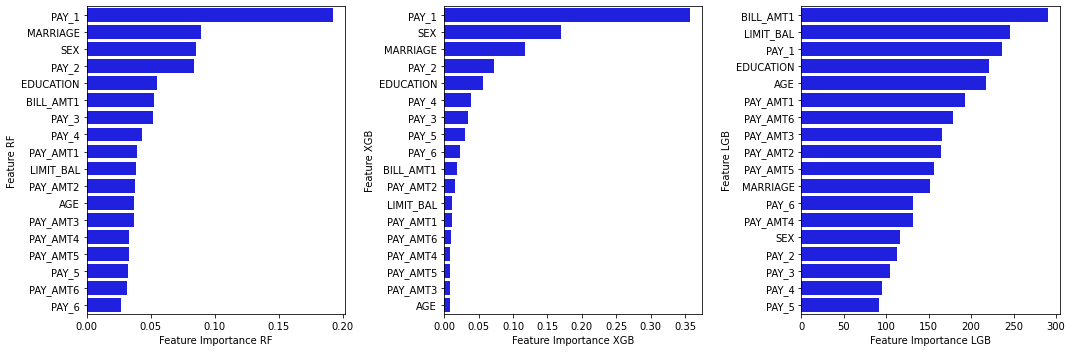

In [ ]:
# plotting feature importance graph
fig,ax = plt.subplots(1,3, figsize=(15,5))
bar = sns.barplot(x='Feature Importance RF', y='Feature RF', data=rf_sorting_features, color='blue', ax=ax[0])
bar = sns.barplot(x='Feature Importance XGB', y='Feature XGB', data=xgb_sorting_features, color='blue', ax=ax[1])
bar = sns.barplot(x='Feature Importance LGB', y='Feature LGB', data=lgb_sorting_features, color='blue', ax=ax[2])

plt.tight_layout()
plt.show()

###**10.3 Conclusion**

In this project, we tackled a classification problem in which we had to classify and predict whether a credit card holder is likely to default on their payments. This problem is important for credit card companies, as it allows them to identify risky borrowers and take appropriate measures to minimize their losses.
* There were **30000 records and 25 attributes** in the dataset.
* We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA) to get a clear insight into each feature by separating the dataset into numeric and categoric features. We did Univariate, Bivariate, and even multivariate analyses.
* After that, the outliers and null values were checked from the raw data. Data were transformed to ensure that it was compatible with machine learning models.
* In feature engineering we transformed raw data into a more useful and informative form, by **encoding**, **feature manipulation**, and **feature selection**. We handled target class imbalance using **SMOTE**.
* Then finally cleaned and scaled data was sent to various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model. To select the final model based on requirements, we checked model_result.
* When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, however, **focusing more on the Recall score and F1 score** because we are dealing with credit card data and our data is unbalanced.
* Our **highest recall score, 0.908, came from KNN**.
* The **LightGBM, XGBoost and RandomForestClassifier also provided the best approach** to achieving our goal. We were successful in achieving a respective f1-score of 0.866, 0.867 and 0.868.

The recall score is of the utmost significance in the banking field, where we place a greater emphasis on reducing false negative values because we do not want to mispredict a person's default status when he has defaulted. With recall scores of 0.908, 0.827, and 0.815, respectively, KNN, RandomForest, and XGB performed the best.

**Last but not least, we can select the Final model as our KNN classifier due to its highest recall score.**

#### **Way Forward**

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.